# Basics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns
import numpy as np

## Import data

In [2]:
data_senior = pd.read_csv('raw_data/senior_transportation.csv')
data_bus = pd.read_csv('raw_data/bus_routes.csv')
data_users = pd.read_csv('raw_data/churn_users.csv')
data_od = pd.read_csv('raw_data/churn_OD.csv')

In [3]:
data_bus
#linkid refers to a unique road segment which is originally provided by HERE API, according to the data provider

,IDRoute,linkid
0,1,537277300
1,1,537277673
2,1,537277754
3,1,537277777
4,1,537277795
...,...,...
48307,166,1226896489
48308,166,1226896507
48309,166,1226896508
48310,166,1226896568


In [4]:
data_senior

,linkid,Region_of_Origin,District_of_Origin,County_of_Origin,Average_Daily_SeniorPopulation_Travelling
0,80216810,R1 - AM Lisboa,Lisboa,Lisboa,2013.681187
1,80216810,R1 - AM Lisboa,Setúbal,Palmela,7688.296396
2,80216810,R1 - AM Lisboa,Lisboa,Oeiras,220.647248
3,80216810,R1 - AM Lisboa,Lisboa,Vila Franca de Xira,233.203075
4,80216812,R1 - AM Lisboa,Lisboa,Lisboa,261.606014
...,...,...,...,...,...
121048,1223824210,R1 - AM Lisboa,Setúbal,Barreiro,1877.243984
121049,1223824210,R1 - AM Lisboa,Setúbal,Palmela,505.273329
121050,1223824211,R1 - AM Lisboa,Setúbal,Palmela,505.273329
121051,1223824211,R1 - AM Lisboa,Setúbal,Barreiro,961.962684


In [5]:
data_od

,Region_of_Origin,District_of_Origin,County_of_Origin,Region_of_Public_Transportation,District_of_Public_Transportation,County_of_Public_Transportation,Dicofre_ParishCode_of_Public_Transportation,Demand_weight
0,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110608,0.307323
1,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110639,0.069997
2,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110658,0.066059
3,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110654,0.059847
4,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110633,0.052341
...,...,...,...,...,...,...,...,...
2248,R2 - AM Porto,Porto,Vila Nova de Gaia,R1 - AM Lisboa,SETÚBAL,ALMADA,150315,0.000000
2249,R2 - AM Porto,Porto,Vila Nova de Gaia,R2 - AM Porto,PORTO,GONDOMAR,130414,0.000000
2250,R2 - AM Porto,Porto,Vila Nova de Gaia,R1 - AM Lisboa,LISBOA,ODIVELAS,111608,0.000000
2251,R2 - AM Porto,Porto,Vila Nova de Gaia,R1 - AM Lisboa,SETÚBAL,ALMADA,150313,0.000000


In [6]:
data_users

,Region_of_Origin,District_of_Origin,County_of_Origin,Period,GenderDescription,AgeClassDescription,Average_BusUsers_per_Day
0,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,15-24,294.194206
1,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,25-34,1081.652817
2,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,35-44,235.836653
3,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,45-54,840.951323
4,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,55-64,1216.148092
...,...,...,...,...,...,...,...
539,R2 - AM Porto,Porto,Vila Nova de Gaia,Sep-20 to Jan-21,Male,15-24,4452.188395
540,R2 - AM Porto,Porto,Vila Nova de Gaia,Sep-20 to Jan-21,Male,25-34,363.461965
541,R2 - AM Porto,Porto,Vila Nova de Gaia,Sep-20 to Jan-21,Male,35-44,214.023515
542,R2 - AM Porto,Porto,Vila Nova de Gaia,Sep-20 to Jan-21,Male,45-54,1443.335763


# Data Exploration

## data_bus

## data_senior

In [7]:
# data collected between Apr 2019 and March 2020

In [8]:
data_senior.shape

(121053, 5)

In [9]:
data_senior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121053 entries, 0 to 121052
Data columns (total 5 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   linkid                                     121053 non-null  int64  
 1   Region_of_Origin                           121053 non-null  object 
 2   District_of_Origin                         121053 non-null  object 
 3   County_of_Origin                           121053 non-null  object 
 4   Average_Daily_SeniorPopulation_Travelling  121053 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.6+ MB


In [10]:
data_senior['Average_Daily_SeniorPopulation_Travelling'].describe()

count    121053.000000
mean        729.366014
std        1773.868105
min          20.464702
25%         116.601537
50%         233.203075
75%         577.885650
max       28955.439210
Name: Average_Daily_SeniorPopulation_Travelling, dtype: float64

In [11]:
data_senior['linkid'].nunique() #75041 road segments 

75041

<function matplotlib.pyplot.show(close=None, block=None)>

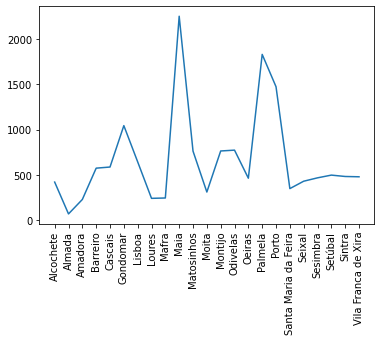

In [12]:
data_senior_counties = data_senior[['County_of_Origin', "Average_Daily_SeniorPopulation_Travelling"]].groupby("County_of_Origin").mean()
plt.plot(data_senior_counties)
plt.xticks(rotation='vertical')
plt.show

# we can see the counties with the greatest average daily senior population travelling as a mean 
# the data_senior includes various means of transportation including foot, cars, buses etc...

In [13]:
data_senior['County_of_Origin'].unique() #23 counties

array(['Lisboa', 'Palmela', 'Oeiras', 'Vila Franca de Xira', 'Sintra',
       'Barreiro', 'Seixal', 'Almada', 'Amadora', 'Mafra', 'Odivelas',
       'Sesimbra', 'Maia', 'Loures', 'Porto', 'Gondomar', 'Setúbal',
       'Cascais', 'Montijo', 'Santa Maria da Feira', 'Matosinhos',
       'Moita', 'Alcochete'], dtype=object)

## data_users

In [14]:
data_users.head(15)
#bus usage per counties, gender, age and timeframe

,Region_of_Origin,District_of_Origin,County_of_Origin,Period,GenderDescription,AgeClassDescription,Average_BusUsers_per_Day
0,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,15-24,294.194206
1,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,25-34,1081.652817
2,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,35-44,235.836653
3,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,45-54,840.951323
4,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,55-64,1216.148092
5,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Male,15-24,1148.427051
6,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Male,25-34,421.940180
7,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Male,35-44,137.697607
8,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Male,45-54,617.693161
9,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Male,55-64,867.481913


In [15]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Region_of_Origin          544 non-null    object 
 1   District_of_Origin        544 non-null    object 
 2   County_of_Origin          544 non-null    object 
 3   Period                    544 non-null    object 
 4   GenderDescription         544 non-null    object 
 5   AgeClassDescription       544 non-null    object 
 6   Average_BusUsers_per_Day  544 non-null    float64
dtypes: float64(1), object(6)
memory usage: 29.9+ KB


In [16]:
data_users.describe()

,Average_BusUsers_per_Day
count,544.000000
mean,1165.396638
std,3842.867736
min,5.514983
25%,158.801133
50%,475.677330
75%,990.064295
max,66882.208460


In [17]:
data_users_pre = data_users[data_users['Period']== 'Sep-19 to Feb-20']
data_users_covid = data_users[data_users['Period']== 'Sep-20 to Jan-21']

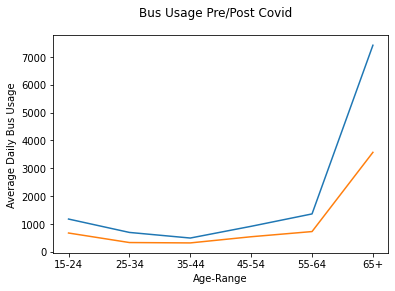

In [18]:
fig = plt.figure()
fig.suptitle('Bus Usage Pre/Post Covid')
plt.plot(data_users_pre.groupby("AgeClassDescription").mean()) #there is an average of 7'000 daily bus usage for seniors pre-covid
plt.plot(data_users_covid.groupby("AgeClassDescription").mean()) #there is an average of 3'500 daily bus usage for seniors pre- covid
plt.xlabel('Age-Range')
plt.ylabel('Average Daily Bus Usage')
plt.show()

In [19]:
average_decrease_bus_usage = (data_users_covid.groupby("AgeClassDescription").mean() - data_users_pre.groupby("AgeClassDescription").mean())\
                            /data_users_pre.groupby("AgeClassDescription").mean() * 100
average_decrease_bus_usage.reset_index(inplace=True)
average_decrease_bus_usage

,AgeClassDescription,Average_BusUsers_per_Day
0,15-24,-42.623153
1,25-34,-52.181684
2,35-44,-35.424883
3,45-54,-40.932808
4,55-64,-46.552053
5,65+,-51.845824


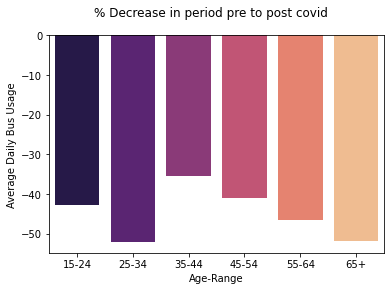

In [20]:
fig = plt.figure()
fig.suptitle('% Decrease in period pre to post covid')
sns.set_palette('magma')
sns.barplot(x='AgeClassDescription', y='Average_BusUsers_per_Day', data = average_decrease_bus_usage)
plt.xlabel('Age-Range')
plt.ylabel('Average Daily Bus Usage')
plt.show()

### data_users_senior

In [21]:
data_users_senior =  data_users[data_users['AgeClassDescription']=='65+']
data_users_senior

,Region_of_Origin,District_of_Origin,County_of_Origin,Period,GenderDescription,AgeClassDescription,Average_BusUsers_per_Day
10,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Male,65+,1612.851365
16,R1 - AM Lisboa,Lisboa,Cascais,Sep-19 to Feb-20,Female,65+,2017.333975
27,R1 - AM Lisboa,Lisboa,Lisboa,Sep-19 to Feb-20,Female,65+,4955.503747
33,R1 - AM Lisboa,Lisboa,Lisboa,Sep-19 to Feb-20,Male,65+,4116.755355
39,R1 - AM Lisboa,Lisboa,Loures,Sep-19 to Feb-20,Female,65+,147.474840
54,R1 - AM Lisboa,Lisboa,Mafra,Sep-19 to Feb-20,Male,65+,1217.088440
64,R1 - AM Lisboa,Lisboa,Odivelas,Sep-19 to Feb-20,Male,65+,5441.109494
70,R1 - AM Lisboa,Lisboa,Oeiras,Sep-19 to Feb-20,Female,65+,2264.585254
75,R1 - AM Lisboa,Lisboa,Oeiras,Sep-19 to Feb-20,Male,65+,9574.868536
81,R1 - AM Lisboa,Lisboa,Sintra,Sep-19 to Feb-20,Female,65+,341.166005


In [22]:
data_sen_plot = data_users_senior[['County_of_Origin','Period','GenderDescription','Average_BusUsers_per_Day']]

### Pre-covid

In [23]:
# For the pre-covid period
data_pre_covid = data_sen_plot[data_sen_plot['Period']== 'Sep-19 to Feb-20']
data_pre_covid['County_of_Origin'].nunique()

19

In [24]:
data_pre_covid[data_pre_covid['County_of_Origin']=='Palmela']

,County_of_Origin,Period,GenderDescription,Average_BusUsers_per_Day
138,Palmela,Sep-19 to Feb-20,Female,2484.065644


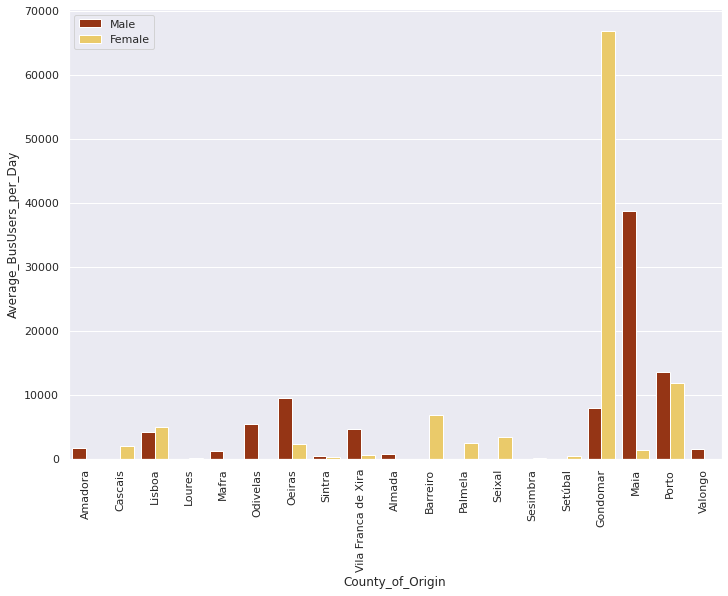

In [25]:
#average bus users per day per gender per counties pre-covid
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.xticks(rotation='vertical')
sns.barplot(x='County_of_Origin', y='Average_BusUsers_per_Day', hue= 'GenderDescription',data = data_pre_covid, palette='afmhot')
plt.legend(loc=2)

### Covid

In [26]:
# For the covid period
data_covid = data_sen_plot[data_sen_plot['Period']== 'Sep-20 to Jan-21']
data_covid['County_of_Origin'].nunique()

21

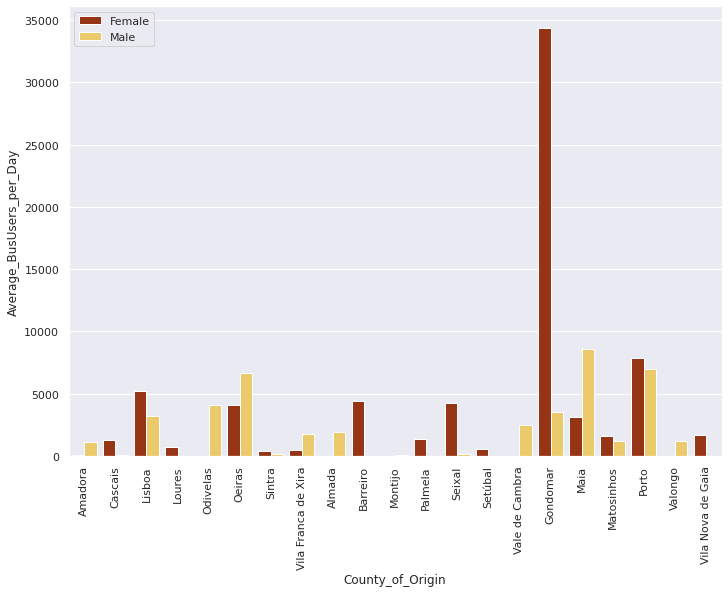

In [27]:
#average bus users per day per gender per counties post-covid
# I CANNOT CHANGE THE HUE COLOR WITH THE SAME AS ABOVE - NEED HELP
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.xticks(rotation='vertical')
sns.barplot(x='County_of_Origin', y='Average_BusUsers_per_Day', hue= 'GenderDescription', data = data_covid, palette='afmhot')
plt.legend(loc=2)

### Pre & Post Covid Distinction

In [28]:
data_covid_sum_gend = data_covid.groupby('County_of_Origin').sum()
data_pre_sum_gend = data_pre_covid.groupby('County_of_Origin').sum()
data_pre_sum_gend.reset_index(inplace=True)
data_covid_sum_gend.reset_index(inplace=True)

In [29]:
data_covid_sum_gend

,County_of_Origin,Average_BusUsers_per_Day
0,Almada,1903.343342
1,Amadora,1165.037261
2,Barreiro,4419.364506
3,Cascais,1363.800121
4,Gondomar,37911.227282
5,Lisboa,8416.241780
6,Loures,702.814481
7,Maia,11683.685654
8,Matosinhos,2759.206414
9,Montijo,48.085261


In [30]:
data_pre_sum_gend

,County_of_Origin,Average_BusUsers_per_Day
0,Almada,754.478639
1,Amadora,1612.851365
2,Barreiro,6863.508899
3,Cascais,2017.333975
4,Gondomar,74829.259132
5,Lisboa,9072.259102
6,Loures,147.474840
7,Mafra,1217.088440
8,Maia,40152.828282
9,Odivelas,5441.109494


In [31]:
data_senior_covid = data_pre_sum_gend.merge(data_covid_sum_gend, on = 'County_of_Origin', how='left')
data_senior_covid.rename(columns={"Average_BusUsers_per_Day_x": "pre_covid", "Average_BusUsers_per_Day_y": "covid"}, inplace=True)
data_senior_covid.head()

,County_of_Origin,pre_covid,covid
0,Almada,754.478639,1903.343342
1,Amadora,1612.851365,1165.037261
2,Barreiro,6863.508899,4419.364506
3,Cascais,2017.333975,1363.800121
4,Gondomar,74829.259132,37911.227282


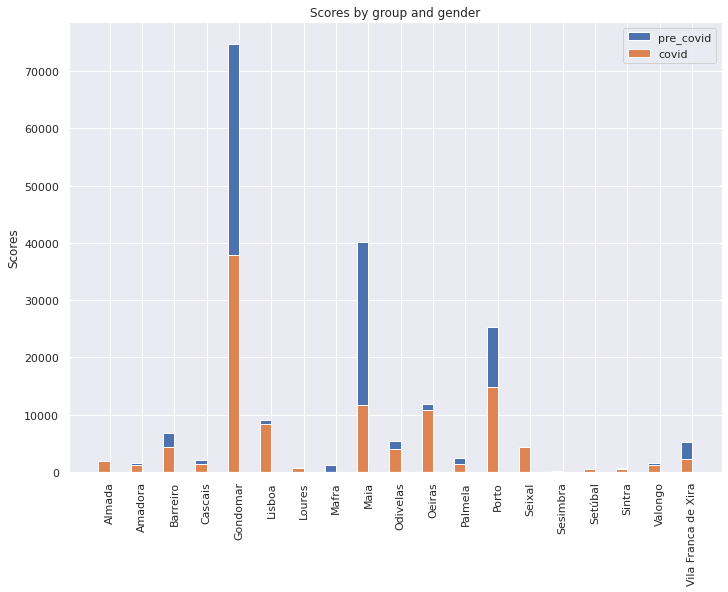

In [34]:
#Checking the drop in Average_BusUsers_per_Day before & After Covid - we can see that some regions such as Gondomar and Matosinhos
#have experienced huge declines
labels = data_senior_covid['County_of_Origin'].tolist()
x = np.arange(len(labels))
width = 0.35 
fig, ax = plt.subplots()

barPre = ax.bar(x - width/2, data_senior_covid['pre_covid'], width, label= 'pre_covid')
barCov = ax.bar(x - width/2, data_senior_covid['covid'], width, label= 'covid')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.xticks(rotation='vertical')
plt.show()

## data_od

In [35]:
data_od

,Region_of_Origin,District_of_Origin,County_of_Origin,Region_of_Public_Transportation,District_of_Public_Transportation,County_of_Public_Transportation,Dicofre_ParishCode_of_Public_Transportation,Demand_weight
0,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110608,0.307323
1,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110639,0.069997
2,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110658,0.066059
3,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110654,0.059847
4,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110633,0.052341
...,...,...,...,...,...,...,...,...
2248,R2 - AM Porto,Porto,Vila Nova de Gaia,R1 - AM Lisboa,SETÚBAL,ALMADA,150315,0.000000
2249,R2 - AM Porto,Porto,Vila Nova de Gaia,R2 - AM Porto,PORTO,GONDOMAR,130414,0.000000
2250,R2 - AM Porto,Porto,Vila Nova de Gaia,R1 - AM Lisboa,LISBOA,ODIVELAS,111608,0.000000
2251,R2 - AM Porto,Porto,Vila Nova de Gaia,R1 - AM Lisboa,SETÚBAL,ALMADA,150313,0.000000


In [37]:
data_od['Dicofre_ParishCode_of_Public_Transportation'].nunique() #100 parishes
#unique identifier for each Parish 
#It is designated DICOFRE in portuguese, related with de first terms of the words DIstrito, COncelho, FREguesia
#refers to destination

100

In [38]:
data_od[['Dicofre_ParishCode_of_Public_Transportation']]
#parish=freguesia FRE (six numbers); 
#municipality=concelho (first 4 numbers) CO; district=distrito DI (first two numbers) from DICOFRE

,Dicofre_ParishCode_of_Public_Transportation
0,110608
1,110639
2,110658
3,110654
4,110633
...,...
2248,150315
2249,130414
2250,111608
2251,150313


In [39]:
data_od[['County_of_Origin','Demand_weight']].groupby('County_of_Origin').sum()
# The demand weight is normalized per county. 
#This means that the sum of all the demand weights with the same county of origin will be around 1

,Demand_weight
County_of_Origin,
Alcochete,1.000004
Almada,1.000006
Amadora,1.000006
Barreiro,1.000002
Cascais,0.999999
Espinho,1.000001
Gondomar,1.000001
Lisboa,0.999998
Loures,1.000000


## Transporlis - Lisbon : Data Exploration 

In [40]:
org_transporlis = ['carris','carristur','cp','fertagus','metro_de_lisboa','metro_transportes_do_sul',
                   'sul_fertagus','transtejo_soflusa','tst']

In [41]:
files = ['agency','calendar','calendar_dates','frequencies','routes','shapes','stop_times','stops','trips']

In [42]:
df_transporlis = [pd.read_csv(f"transporlis_data/data_{org}/{f}.txt") for org in org_transporlis for f in files]

In [43]:
df_transporlis # data for all transportation companies into simple list of dataframes

[   agency_id agency_name            agency_url agency_timezone agency_lang  \
 0          1      Carris  http://www.carris.pt   Europe/Lisbon          pt   
 
    agency_phone  
 0           NaN  ,
        service_id  monday  tuesday  wednesday  thursday  friday  saturday  \
 0        27581474       1        1          1         1       1         0   
 1        27581484       1        1          1         1       1         0   
 2        27581489       1        1          1         1       1         0   
 3        27581544       1        1          1         1       1         0   
 4        27581494       1        1          1         1       1         0   
 ...           ...     ...      ...        ...       ...     ...       ...   
 12992    27592493       0        0          0         0       0         0   
 12993    27592971       1        1          1         1       1         0   
 12994    27592796       1        1          1         1       1         0   
 12995    27593132   

In [44]:
df_transporlis[0][3]

KeyError: 3

In [ ]:
df_transporlis[18]

In [ ]:
df_transporlis = [df_transporlis[x:x+9] for x in range(0, len(df_transporlis))]
# seperating the the list of dfs into list of list of dfs

In [ ]:
df_transporlis[0] #list of dfs for Carris for example

## PORDATA: Data Exploration

### Population by age range by county

In [ ]:
df_pop_raw = pd.read_csv('county_data/PORDATA_Estimativas-a-31-12-por-grupo-etário.csv',dtype=None)

In [ ]:
df_pop_raw = df_pop_raw.iloc[0:353,:40]
df_pop_raw

In [ ]:
counties = data_senior['County_of_Origin'].unique()
counties

In [ ]:
counties_pop = df_pop_raw[df_pop_raw['Regions'].isin(counties)].drop(columns = 'Âmbito Geográfico')
counties_pop.set_index('Regions',inplace=True)

In [ ]:
counties_pop_sen = counties_pop.drop(columns = counties_pop.iloc[:,2:26])
columns_2001 = [col for col in counties_pop_sen.columns if '.' in col]
columns_2019 = [col for col in counties_pop_sen.columns if '.' not in col]
columns_2019.remove('Total: 2001')
columns_2019.remove('Total : 2019')

In [ ]:
counties_pop_sen = counties_pop_sen.apply(lambda x: x.str.replace(',', ''))

In [ ]:
counties_pop_sen['Total +65: 2001'] = counties_pop_sen[columns_2001].sum(axis = 1) # total seniors 2001
counties_pop_sen['Total +65 : 2019'] = counties_pop_sen[columns_2019].sum(axis = 1) # total seniors 2019

In [ ]:
counties_pop_sen.drop([col for col in counties_pop_sen.columns if '.' in col],axis=1,inplace=True)
counties_pop_sen
#population data for all counties in data_senior

### Aging Index per county

In [ ]:
df_age_raw = pd.read_csv('county_data/PORDATA_aging_index_counties.csv',dtype=None)
df_age_raw.set_index('Regions')

### Elderly Dependency Index - Where are there more and less elderly people per 100 people of working age?

In [ ]:
df_eld_dep_raw = pd.read_csv('county_data/PORDATA_early_dependence_index.csv',dtype=None)
df_eld_dep_raw

In [ ]:
df_eld_dep = df_eld_dep_raw[df_eld_dep_raw['Regions'].isin(counties)]

In [ ]:
df_eld_dep.set_index('Regions',inplace=True)
df_eld_dep

### Single Person Families - where are more and less people living alone? Where are more elderly people living alone?

In [ ]:
df_single_fam_raw = pd.read_csv('county_data/PORDATA_single_person_families.csv',dtype=None)
df_single_fam_raw

In [ ]:
df_single_fam = df_single_fam_raw[df_single_fam_raw['Regions'].isin(counties)]

In [ ]:
df_single_fam.set_index('Regions',inplace=True)
df_single_fam

### Population Density - where are there more and less people, on average, per km 2 ?

In [ ]:
df_pop_dense_raw = pd.read_csv('county_data/PORDATA_population_density.csv',dtype=None)
df_pop_dense_raw

In [ ]:
df_pop_dense = df_pop_dense_raw[df_pop_dense_raw['Regions'].isin(counties)]
df_pop_dense = df_pop_dense.iloc[:353].set_index('Regions')
df_pop_dense

### Habitants per pharmacy and per doctors

In [ ]:
df_hab_per_health_raw = pd.read_csv('county_data/PORDATA_habitants_per_pharmacy_doctors.csv',dtype=None)
df_hab_per_health_raw

In [ ]:
df_hab_per_health = df_hab_per_health_raw[df_hab_per_health_raw['Regions'].isin(counties)]
df_hab_per_health = df_hab_per_health.iloc[:353].set_index('Regions')
df_hab_per_health

### Road accidents with victims - Where are there more and less disasters on the roads with injuries or deaths?

In [ ]:
df_road_acc_raw = pd.read_csv('county_data/PORDATA_road_accidents.csv',dtype=None)
df_road_acc_raw

In [ ]:
df_road_acc = df_road_acc_raw[df_road_acc_raw['Regions'].isin(counties)]
df_road_acc = df_road_acc.iloc[:353].set_index('Regions')
df_road_acc

### Environmental Expenditure - Which municipalities spend a greater or lesser percentage of expenses on the environment?

In [ ]:
df_env_exp_raw = pd.read_csv('county_data/PORDATA_environment_expenditure.csv',dtype=None)
df_env_exp_raw

In [ ]:
df_env_exp = df_env_exp_raw[df_env_exp_raw['Regions'].isin(counties)]
df_env_exp = df_env_exp.iloc[:353].set_index('Regions')
df_env_exp

## Here API

GET https://geocode.search.hereapi.com/v1/geocode?q=5+Rue+Daunou%2C+75000+Paris%2C+France
Authorization: Bearer [your token]

GET https://fleet.ls.hereapi.com/2/calculateroute.json
    ?apiKey=6zCeApt0V-KdzY3cYozzby1LdeTHfTbQS3S9q4H0foU
    &mode=fastest;truck;traffic:disabled
    &driver_cost=10
    &waypoint0=50.10992,8.69030
    &waypoint1=50.00658,8.29096

In [ ]:
key = '6zCeApt0V-KdzY3cYozzby1LdeTHfTbQS3S9q4H0foU'
re = requests.get(f"https://fleet.ls.hereapi.com/2/calculateroute.json/\
                    ?apiKey={key}&mode=fastest;truck;\
                    traffic:disabled&driver_cost=10&waypoint0=50.10992,8.69030&waypoint1=50.00658,8.29096")

In [ ]:
re.text